# Gerekli Kütüphaneleri Yükleyelim

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import librosa
import random
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from PIL import Image

# Image Augmentation

#### Resim yükleme ve işleme

In [23]:
# Fotoğraf Linki: https://unsplash.com/photos/parked-white-ford-explorer-suv-a4S6KUuLeoM 
image_path = "suv.jpg"
img = Image.open(image_path)
image = tf.io.read_file(image_path)

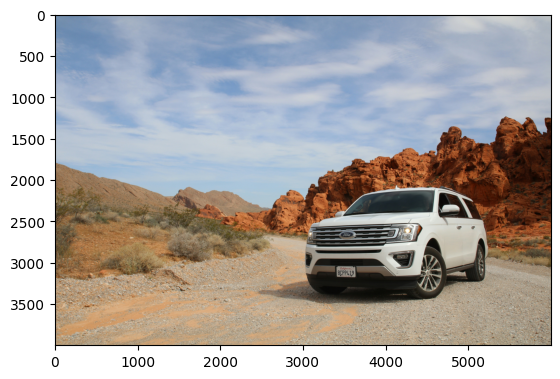

In [24]:
plt.imshow(img)

#### 3 kanallı RGB resim

In [25]:
image_3 = tf.image.decode_jpeg(image, channels=3)

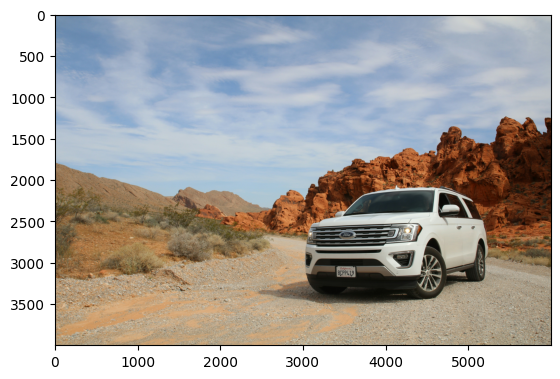

In [26]:
plt.imshow(image_3)

### 1 kanallı resim

In [27]:
image_1 = tf.image.decode_jpeg(image, channels=1)

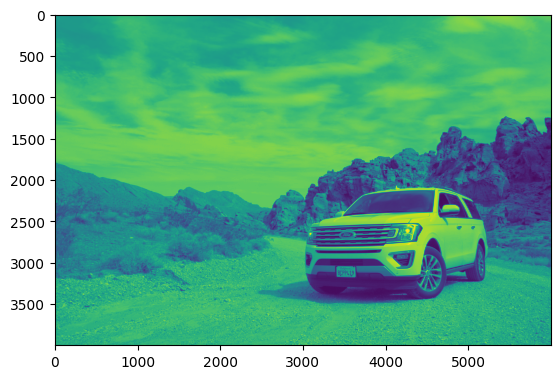

In [28]:
plt.imshow(image_1)

#### Flip (Ters Çevirme)

In [32]:
# Resmi yatay olarak ters çevirme
flipped_image = tf.image.flip_left_right(image_3)

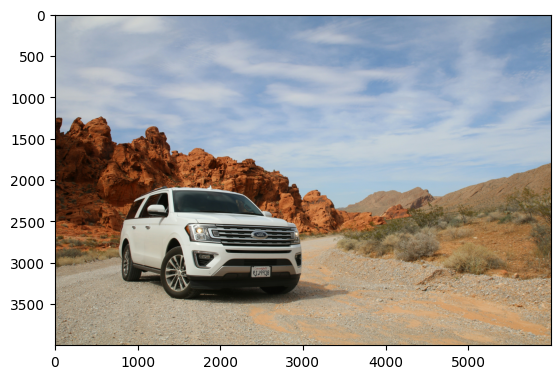

In [33]:
plt.imshow(flipped_image)

In [34]:
flipped_image = tf.image.flip_up_down(image_3)

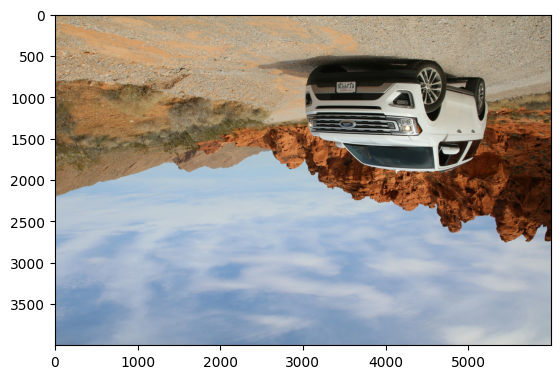

In [37]:
plt.imshow(flipped_image)

#### Brightness (Parlaklık)

In [39]:
# Parlaklığı 0.2 birim artırma
brightness_image = tf.image.adjust_brightness(image_3, delta=0.2)

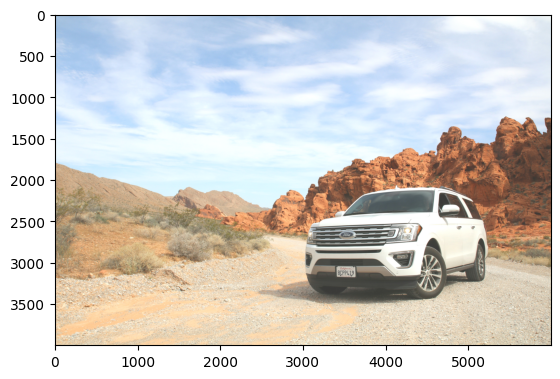

In [40]:
plt.imshow(brightness_image)

#### Contrast (Kontrast)

In [42]:
# Kontrastı 2 katına çıkarma
contrast_image = tf.image.adjust_contrast(image_3, contrast_factor=2)

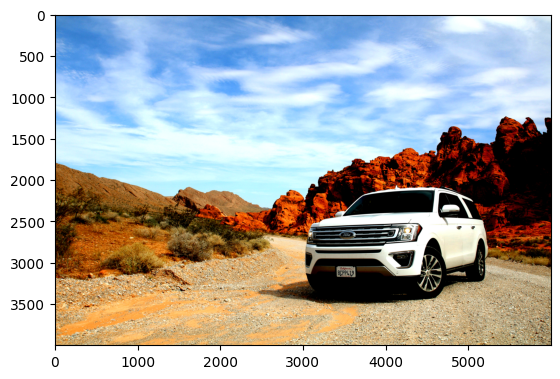

In [43]:
plt.imshow(contrast_image)

#### Saturation (Doygunluk)

In [44]:
#  Doygunluğu 3 katına çıkarma
saturation_image = tf.image.adjust_saturation(image_3, saturation_factor=3)

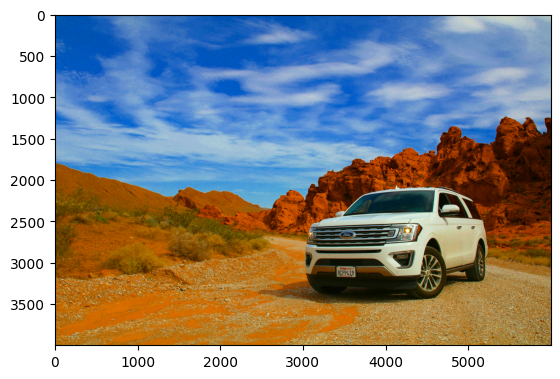

In [45]:
plt.imshow(saturation_image)

#### Hue (Ton)

In [47]:
# Tonu 0.1 birim değiştirme
hue_image = tf.image.adjust_hue(image_3, delta=0.1)

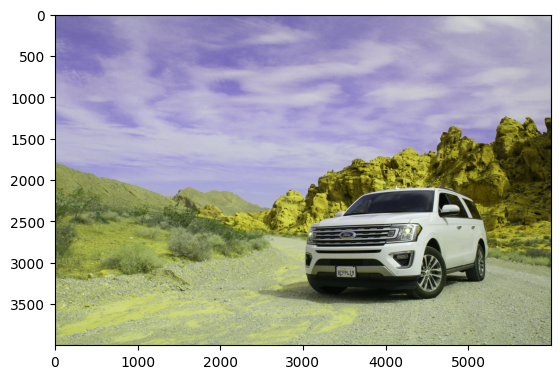

In [48]:
plt.imshow(hue_image)

#### Rotate (Döndürme)

In [49]:
# Resmi 90 derece saat yönünde döndürme.
rotated_image = tf.image.rot90(image_3)

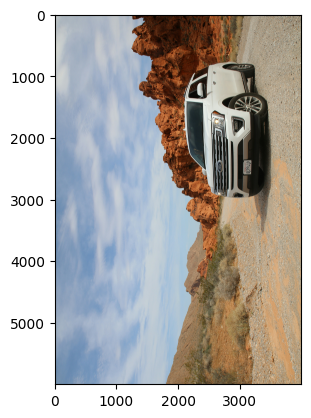

In [50]:
plt.imshow(rotated_image)

#### Zoom (Yakınlaştırma)

In [51]:
# Resmi merkezi %50 oranında kırpma
zoomed_image = tf.image.central_crop(image_3, central_fraction=0.5)

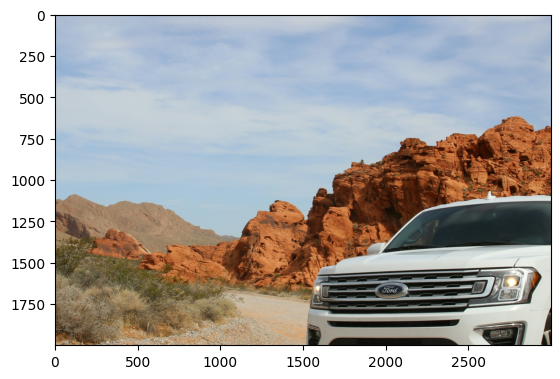

In [52]:
plt.imshow(zoomed_image)

#### Shear (Eğme) 

In [54]:
# Resmi 45 derece eğme
sheared_image = tf.keras.preprocessing.image.apply_affine_transform(image_3, shear=45)

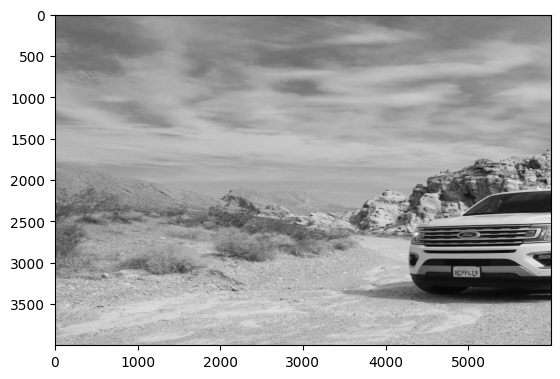

In [55]:
plt.imshow(sheared_image)

#### Shift (Kaydırma)

In [63]:
# Resmi 150 birim yatay ve dikey olarak kaydırma.
shifted_image = tf.keras.preprocessing.image.apply_affine_transform(image_3, tx=150, ty=150)

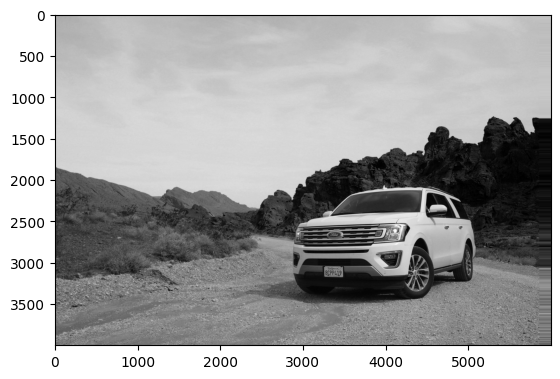

In [64]:
plt.imshow(shifted_image)

# Sound Augmentation

In [3]:
real_audio = "dog.wav"

In [4]:
def plot_ad(ad_path, title):
    plt.figure(figsize=(12, 4))
    plt.plot(ad_path)
    plt.title(title)
    plt.show()

In [5]:
real_ad, real_sr = librosa.load(real_audio)

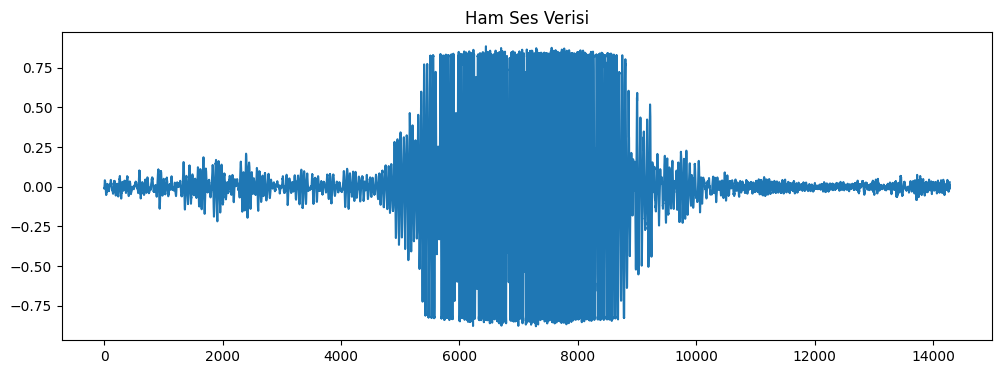

In [6]:
plot_ad(real_ad, "Ham Ses Verisi")

#### Gürültü ekleme

In [8]:
noise_factor = 0.05
noise = np.random.randn(len(real_ad))
noise_data = real_ad + noise_factor * noise

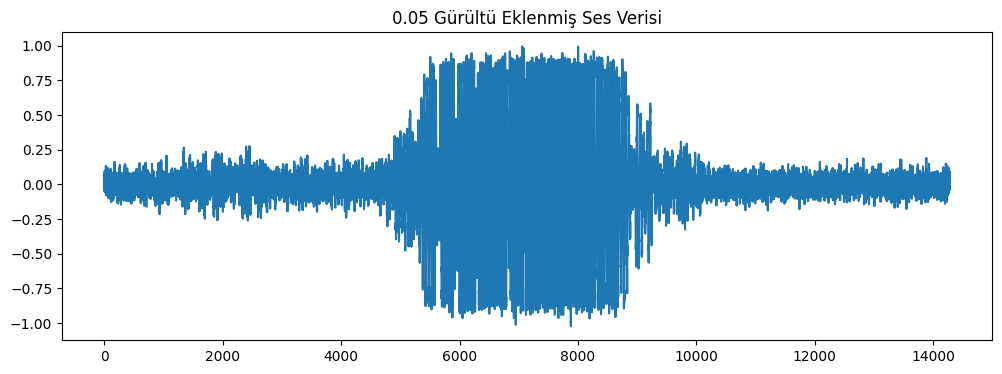

In [9]:
plot_ad(noise_data, "0.05 Gürültü Eklenmiş Ses Verisi")

#### Zaman Kaydırma

In [21]:
# 0.2 kaydıracağız.
time_shift_range = int(real_sr * 0.2)
start_ = int(np.random.uniform(-time_shift_range, time_shift_range))
if start_ >= 0:
    shift_data = np.r_[real_ad[start_:], np.random.uniform(-0.001, 0.001, start_)]
else:
    shift_data = np.r_[np.random.uniform(-0.001, 0.001, -start_), real_ad[:start_]]
shift_data =  shift_data[:len(real_ad)]

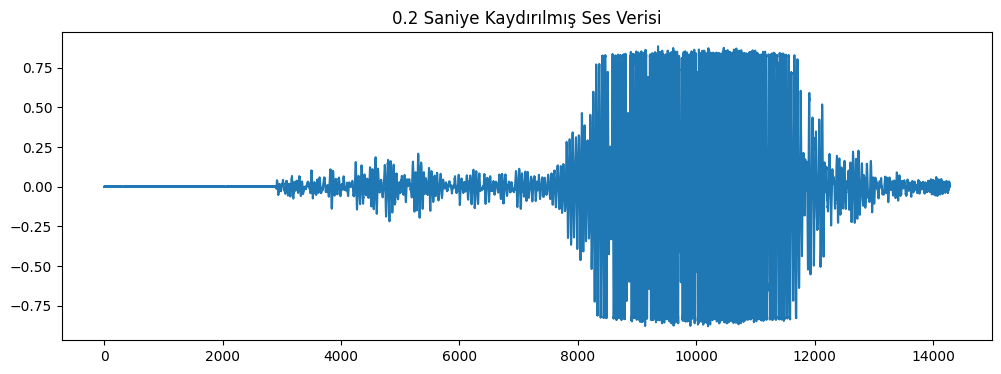

In [23]:
plot_ad(shift_data, "0.2 Saniye Kaydırılmış Ses Verisi")

#### Hız Değiştirme

In [30]:
speed_factor = 2
speed_data = librosa.effects.time_stretch(y=real_ad, rate=speed_factor)

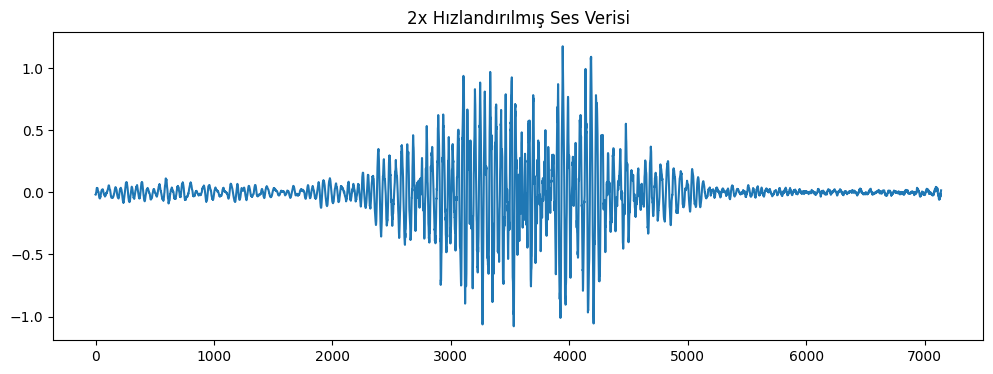

In [31]:
plot_ad(speed_data, "2x Hızlandırılmış Ses Verisi")

#### Perde Değiştirme

In [34]:
pitch_shift_factor = 1.5
pitch_data = librosa.effects.pitch_shift(y=real_ad, sr=real_sr, n_steps=pitch_shift_factor)

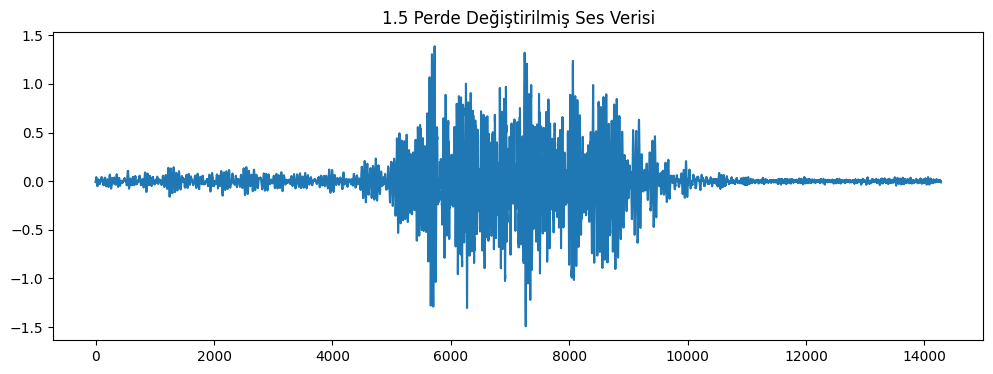

In [35]:
plot_ad(pitch_data, "1.5 Perde Değiştirilmiş Ses Verisi")

# Text Augmentation

In [58]:
text = "This is a sample text."

#### Eş Anlamlılarla Değiştirme

In [59]:
words = word_tokenize(text)
new_words = words.copy()
for i, word in enumerate(words):
    syns = wordnet.synsets(word)
    if syns:
        synonym = random.choice(syns).lemma_names()[0]
        new_words[i] = synonym

In [60]:
new_words = ' '.join(new_words)

In [61]:
print("Ham Metin:", text)
print("Eş Anlamlılarla Değiştirilmiş Metin:", new_words)

Ham Metin: This is a sample text.
Eş Anlamlılarla Değiştirilmiş Metin: This cost adenine sample textbook .


#### Kelime Ekleme

In [64]:
words = word_tokenize(text)
new_words = words.copy()
random_index = random.randint(0, len(words) - 1)
new_words.insert(random_index, 'word')
new_words = ' '.join(new_words)

In [65]:
print("Ham Metin:", text)
print("Kelime Eklenmiş Metin:", new_words)

Ham Metin: This is a sample text.
Kelime Eklenmiş Metin: This is a sample text word .


#### Kelime Silme

In [69]:
words = word_tokenize(text)
random_index = random.randint(0, len(words) - 1)
new_words = words[:random_index] + words[random_index + 1:]
new_words = ' '.join(new_words)

In [70]:
print("Ham Metin:", text)
print("Kelime Silinmiş Metin:", new_words)

Ham Metin: This is a sample text.
Kelime Silinmiş Metin: This is sample text .


#### Kelime Sırası Değiştirme

In [71]:
words = word_tokenize(text)
random.shuffle(words)
new_words = ' '.join(words)

In [72]:
print("Ham Metin:", text)
print("Kelime Sırası Değiştirilmiş Metin:", new_words)

Ham Metin: This is a sample text.
Kelime Sırası Değiştirilmiş Metin: This a is text . sample
